# **Hugging DataSet**

## **Install Library**

In [7]:
!pip install datasets


## **Importing Library**

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

## **Loading the Data Set**

In [9]:



# Loading the dataset from Hugging Face
dataset = load_dataset("tanzuhuggingface/creditcardfraudtraining")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## **Creating the Data Frame**

In [10]:
Credit_df  = pd.DataFrame(dataset['train'])

In [ ]:

Credit_df


# **Exploratry Data Analysis**

In [ ]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   index         int64  
 2   time_elapsed  int64  
 3   cc_num        float64
 4   amt           float64
 5   lat           float64
 6   long          float64
 7   is_fraud      int64  
dtypes: float64(4), int64(4)
memory usage: 127.3 MB


In [ ]:
Credit_df['is_fraud'].value_counts()

,count
is_fraud,
0,1042569
1,1042569


## **Cout Plot**

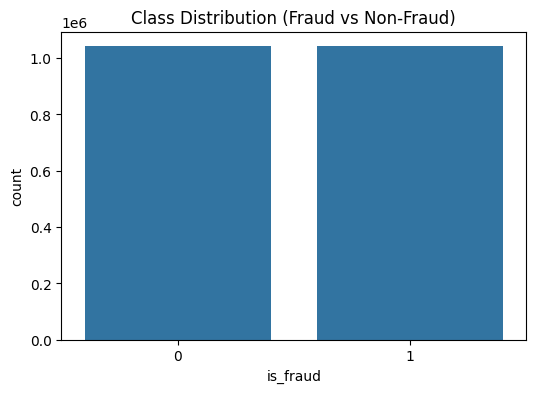

In [ ]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=Credit_df )
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


## **Missing Values**

In [ ]:
# Check for missing values
print("Missing values per column:")
print(Credit_df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(Credit_df.dtypes)


Missing values per column:
id              0
index           0
time_elapsed    0
cc_num          0
amt             0
lat             0
long            0
is_fraud        0
dtype: int64

Data types of each column:
id                int64
index             int64
time_elapsed      int64
cc_num          float64
amt             float64
lat             float64
long            float64
is_fraud          int64
dtype: object


In [ ]:
# Summary statistics
Credit_df.describe()

,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
count,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2085138.0
mean,1.042568e+06,5.049692e+05,1.169697e+00,3.965088e+17,2.992306e+02,3.858014e+01,-9.004107e+01,0.5
std,6.019276e+05,4.089742e+05,7.291183e+00,1.637756e+18,4.955343e+02,6.704931e+00,1.827680e+01,0.5
min,0.000000e+00,-1.612912e+06,-3.000000e+01,-6.986079e+18,-2.159578e+03,1.511058e+00,-2.269371e+02,0.0
25%,5.212842e+05,2.117852e+05,0.000000e+00,6.304420e+11,1.501000e+01,3.408775e+01,-9.925484e+01,0.0
50%,1.042568e+06,5.054810e+05,0.000000e+00,3.543300e+15,8.474000e+01,3.911268e+01,-8.799734e+01,0.5
75%,1.563853e+06,8.031388e+05,2.000000e+00,5.330299e+17,5.406551e+02,4.272800e+01,-7.844002e+01,1.0
max,2.085137e+06,2.794497e+06,8.300000e+01,1.122925e+19,2.894890e+04,9.152811e+01,1.470988e-01,1.0


## **Distribution Plot**

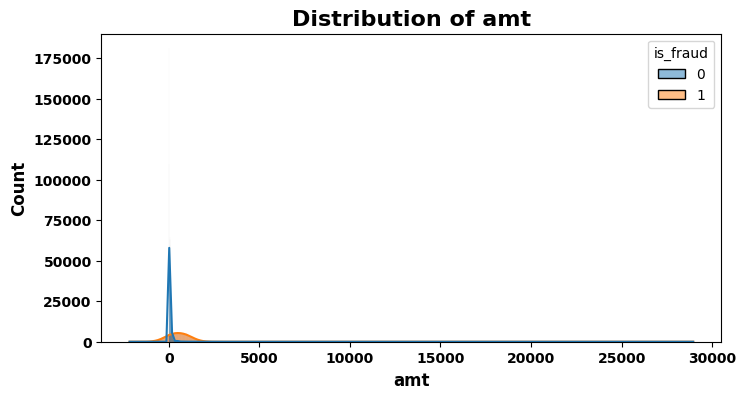

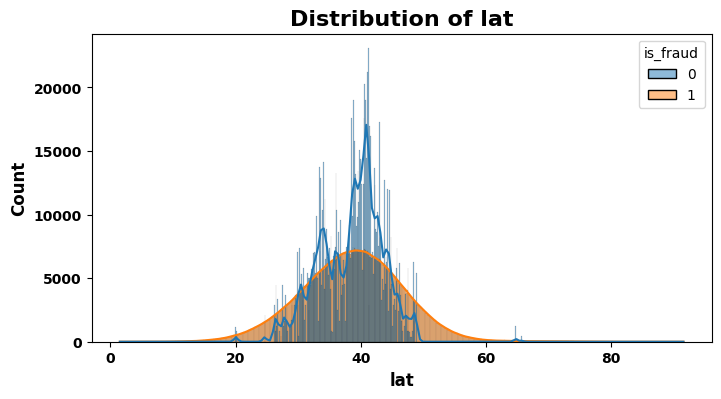

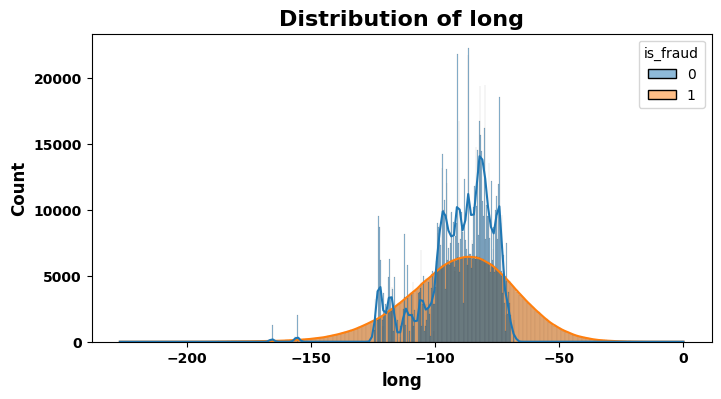

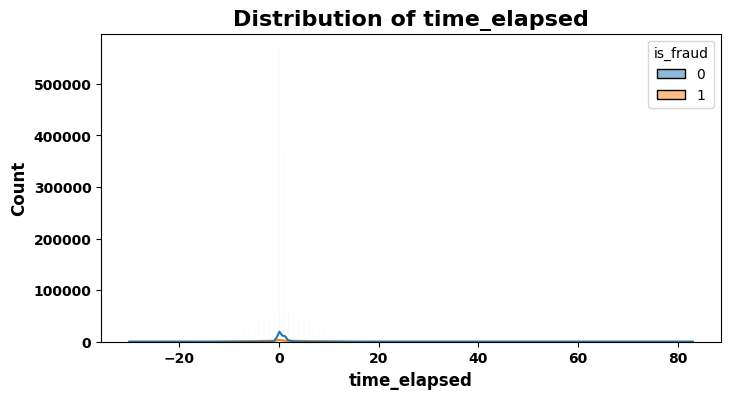

In [ ]:
# Distribution plots for numerical features
numerical_features = ['amt', 'lat', 'long', 'time_elapsed']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Credit_df, x=feature, hue='is_fraud', kde=True)  # Add hue for color
    plt.title(f"Distribution of {feature}", fontsize=16, fontweight='bold')  # Increase title font size and bold
    plt.xlabel(feature, fontsize=12, fontweight='bold')  # Increase x-axis label font size and bold
    plt.ylabel("Count", fontsize=12, fontweight='bold')  # Increase y-axis label font size and bold
    plt.xticks(fontsize=10, fontweight='bold')  # Increase x-axis tick label font size and bold
    plt.yticks(fontsize=10, fontweight='bold')  # Increase y-axis tick label font size and bold
    plt.show()

In [11]:
Credit_df.drop(columns=['id', 'index','cc_num'], inplace=True)

## **Corelation Matix**

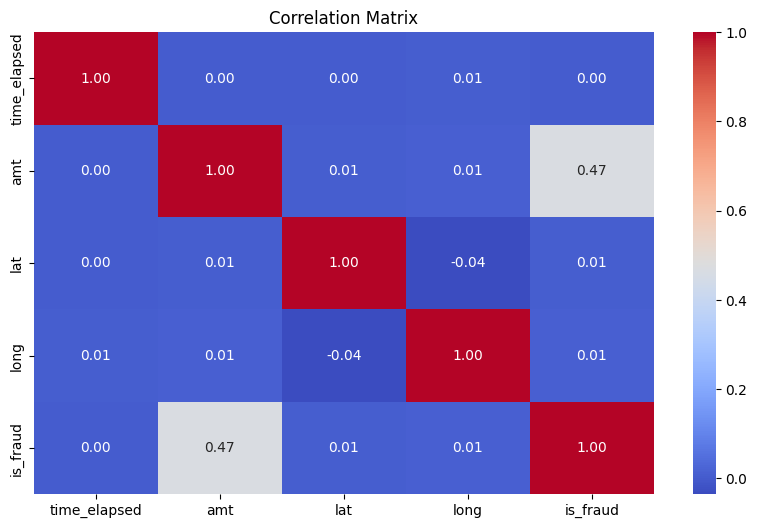

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = Credit_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## **Pair Plot**

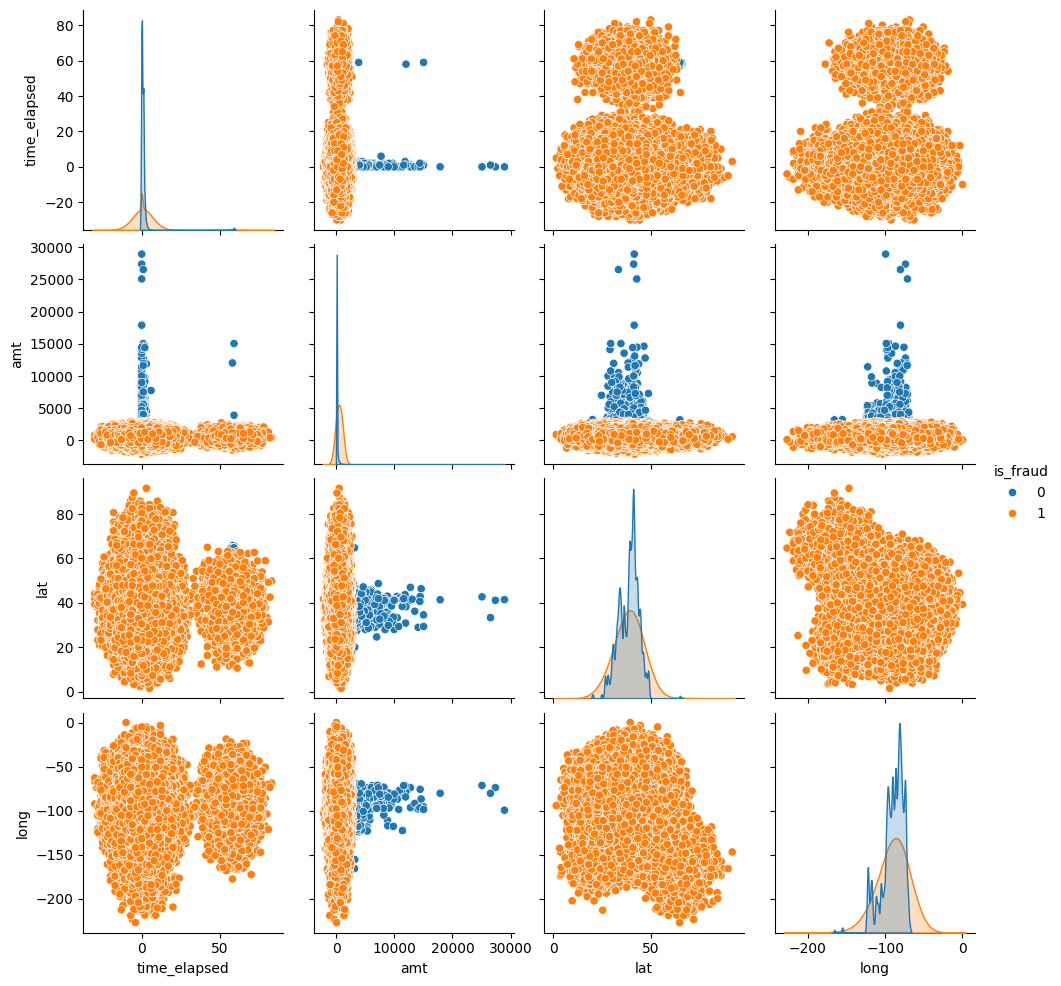

In [ ]:
# Create a pair plot for the numerical features with color for class labels
sns.pairplot(Credit_df, diag_kind='kde', corner=False, hue='is_fraud')  # Add hue for color by class


In [ ]:
import matplotlib.font_manager as fm

# Iterate through axes and customize tick labels and font size
for ax in axes:
    ax.tick_params(axis='both', labelsize=10)  # Set label size

    # Get tick labels and set font properties for bolding
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(fm.FontProperties(weight='bold'))  # Set font weight to bold

    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')  # Increase x-axis label font size and bold
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')  # Increase y-axis label font size and bold

plt.show()

## **Scatter Plot**

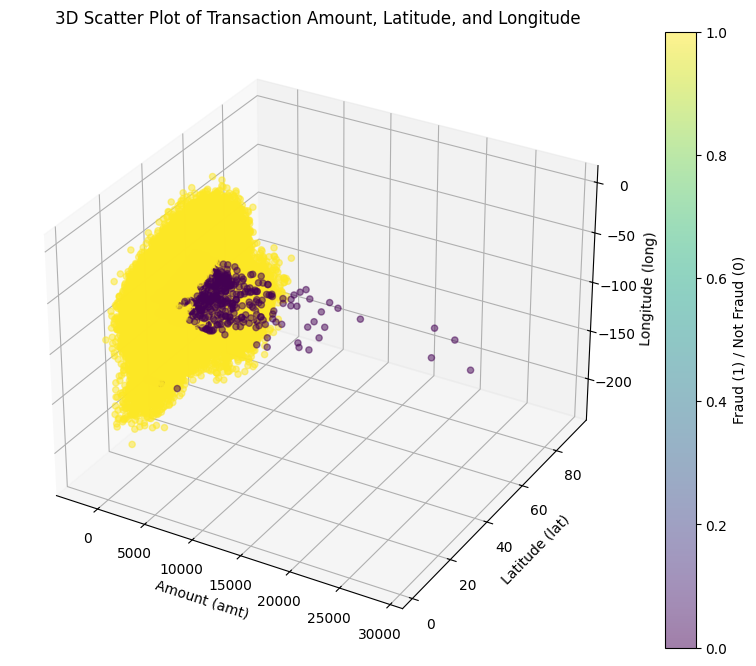

In [ ]:

# Select three numerical features for the 3D scatter plot
x = Credit_df['amt']
y = Credit_df['lat']
z = Credit_df['long']
c = Credit_df['is_fraud'] # Color by fraud status

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)

ax.set_xlabel('Amount (amt)')
ax.set_ylabel('Latitude (lat)')
ax.set_zlabel('Longitude (long)')
ax.set_title('3D Scatter Plot of Transaction Amount, Latitude, and Longitude')

# Add a colorbar to show the mapping of colors to fraud status
fig.colorbar(scatter, label='Fraud (1) / Not Fraud (0)')

plt.show()

## **Box Plot**

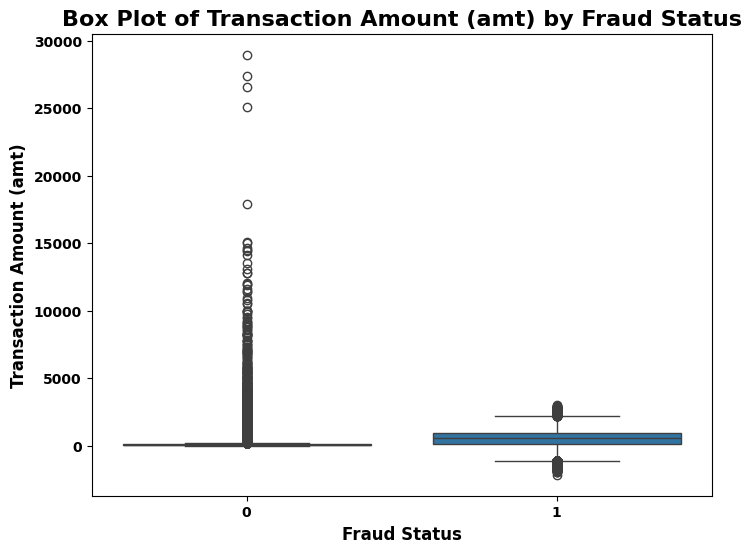

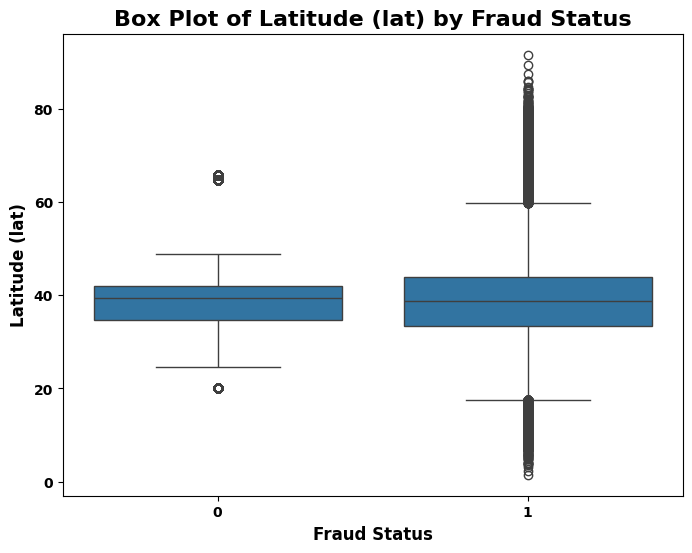

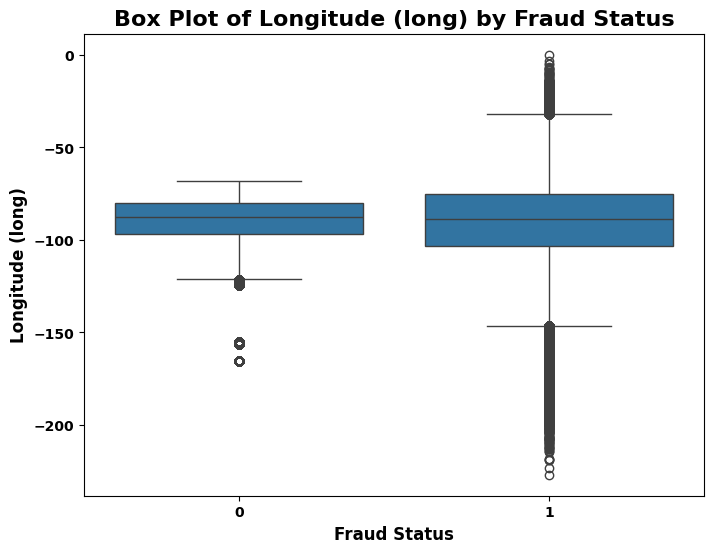

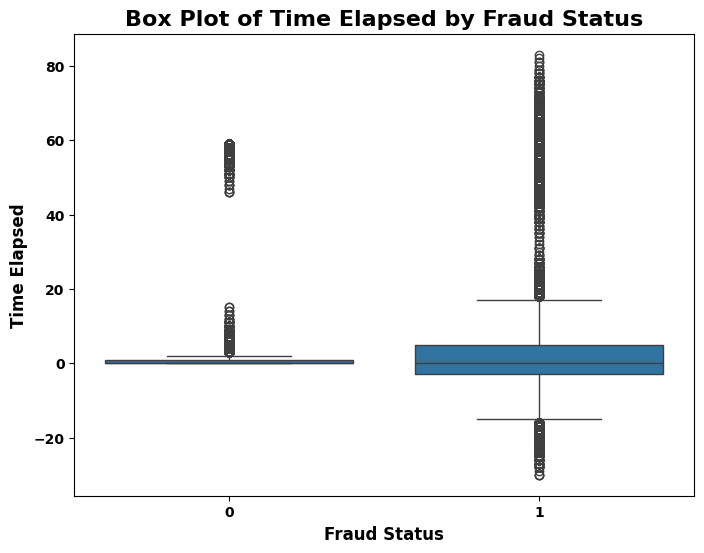

In [ ]:
import matplotlib.font_manager as fm

# Box plot for 'amt'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=Credit_df)
plt.title('Box Plot of Transaction Amount (amt) by Fraud Status', fontsize=16, fontweight='bold')
plt.xlabel('Fraud Status', fontsize=12, fontweight='bold')
plt.ylabel('Transaction Amount (amt)', fontsize=12, fontweight='bold')
# Bolding tick labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontproperties(fm.FontProperties(weight='bold'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Box plot for 'lat'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='lat', data=Credit_df)
plt.title('Box Plot of Latitude (lat) by Fraud Status', fontsize=16, fontweight='bold')
plt.xlabel('Fraud Status', fontsize=12, fontweight='bold')
plt.ylabel('Latitude (lat)', fontsize=12, fontweight='bold')
# Bolding tick labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontproperties(fm.FontProperties(weight='bold'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Box plot for 'long'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='long', data=Credit_df)
plt.title('Box Plot of Longitude (long) by Fraud Status', fontsize=16, fontweight='bold')
plt.xlabel('Fraud Status', fontsize=12, fontweight='bold')
plt.ylabel('Longitude (long)', fontsize=12, fontweight='bold')
# Bolding tick labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontproperties(fm.FontProperties(weight='bold'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Box plot for 'time_elapsed'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='time_elapsed', data=Credit_df)
plt.title('Box Plot of Time Elapsed by Fraud Status', fontsize=16, fontweight='bold')
plt.xlabel('Fraud Status', fontsize=12, fontweight='bold')
plt.ylabel('Time Elapsed', fontsize=12, fontweight='bold')
# Bolding tick labels
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontproperties(fm.FontProperties(weight='bold'))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# **Model Implementation**

## **Min Max Scaller**

In [12]:

# Separate features and target variable
X = Credit_df.drop(columns=['is_fraud'])
y = Credit_df['is_fraud']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Assuming 'X' contains your features
numerical_features = ['amt', 'lat', 'long', 'time_elapsed']  # Your numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

## **Train Test Split**

In [14]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




## **LogisticRegression**

### **Model Training**

In [8]:
from sklearn.linear_model import LogisticRegression

# Train a model and measure time
start_time = time.time()  # Record start time
model = LogisticRegression()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.8233
Precision: 0.9632
Recall: 0.6723
F1 Score: 0.7918
ROC AUC: 0.7695
Training Time: 7.8182 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85    312771
           1       0.96      0.67      0.79    312771

    accuracy                           0.82    625542
   macro avg       0.86      0.82      0.82    625542
weighted avg       0.86      0.82      0.82    625542



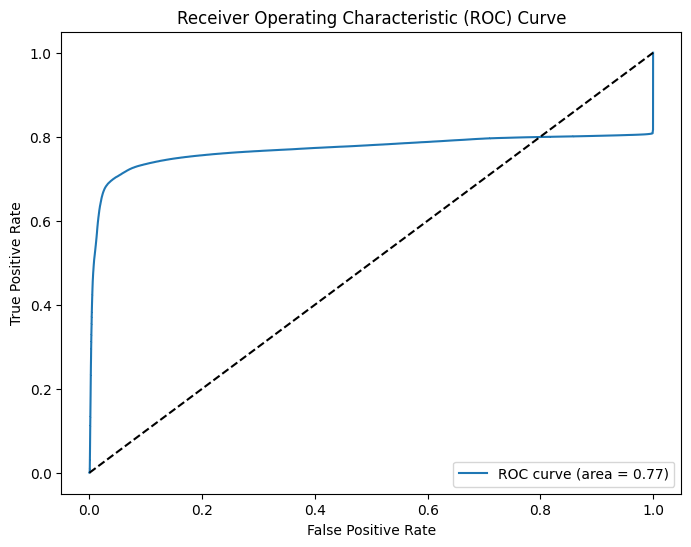

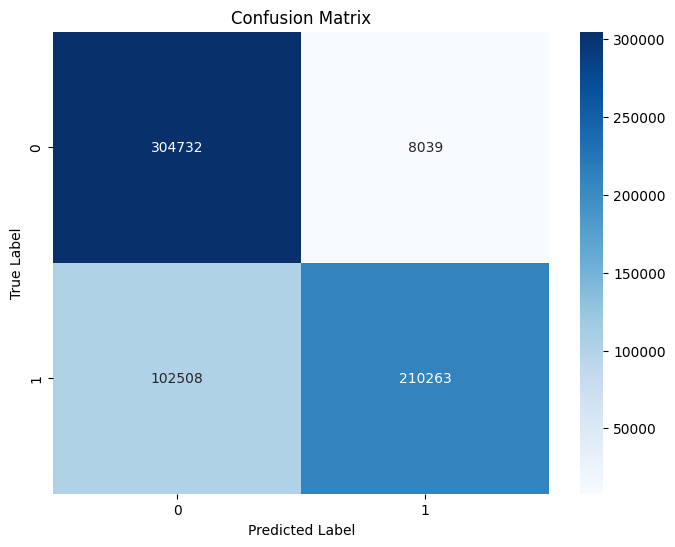

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **XGBClassifier**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = XGBClassifier()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.9843
Precision: 0.9889
Recall: 0.9795
F1 Score: 0.9842
ROC AUC: 0.9979
Training Time: 12.0079 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



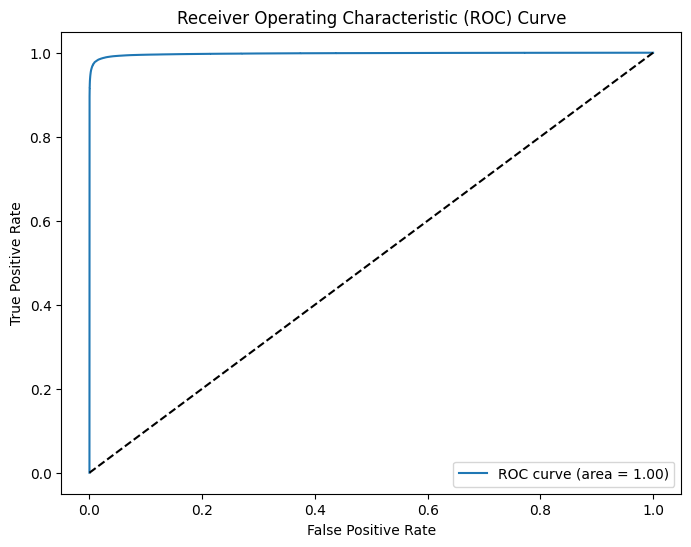

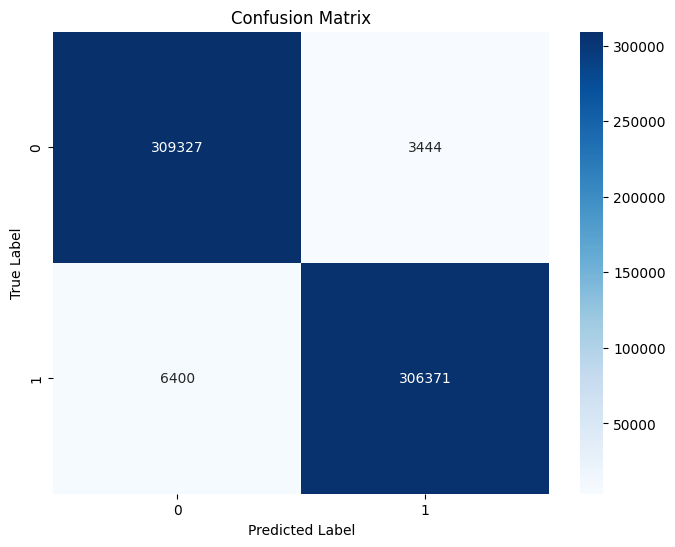

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **DecisionTreeClassifier**

### **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


Model Performance:
Accuracy: 0.9826
Precision: 0.9863
Recall: 0.9789
F1 Score: 0.9825
ROC AUC: 0.9826
Training Time: 22.9832 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



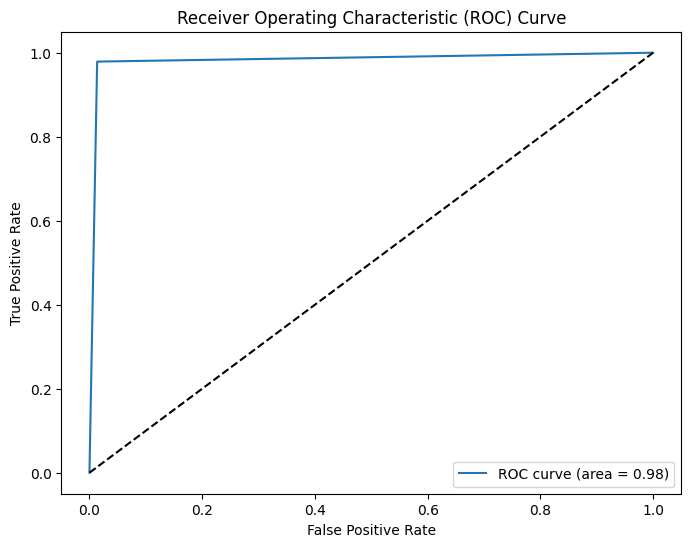

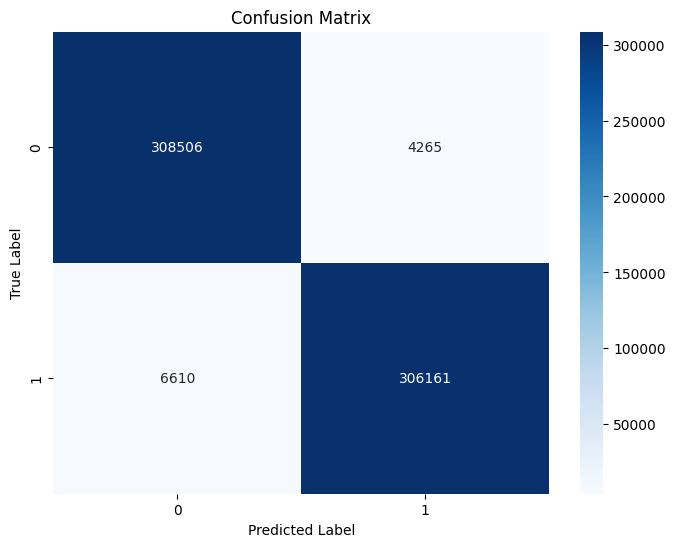

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## **RandomForestClassifier**

### **Model Training**

In [ ]:


# Train a model and measure time
start_time = time.time()  # Record start time
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.9848
Precision: 0.9897
Recall: 0.9798
F1 Score: 0.9847
ROC AUC: 0.9984
Training Time: 569.6242 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



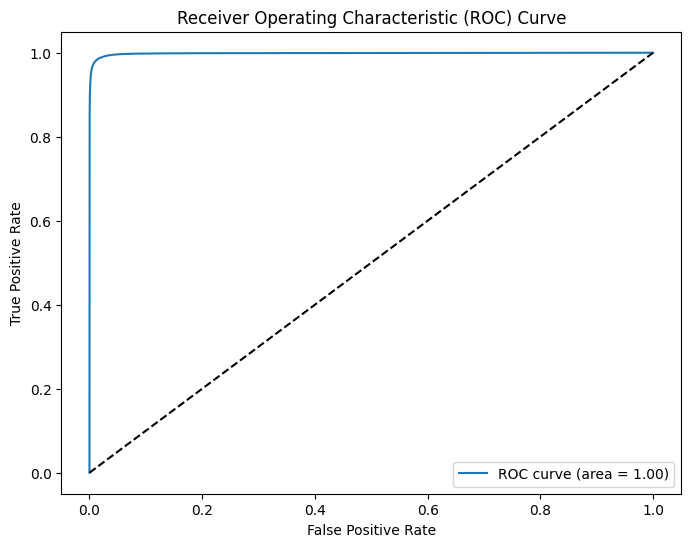

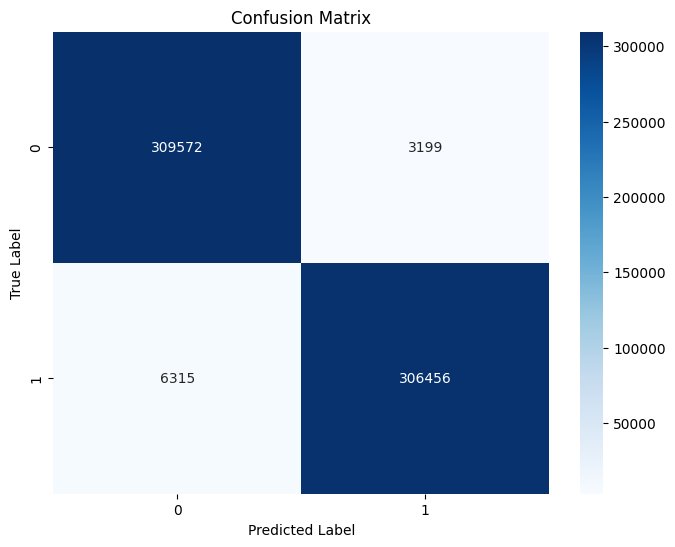

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **MLPClassifier**

### **Model Training**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = MLPClassifier(random_state=42, max_iter=10)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Model Evalution**

Model Performance:
Accuracy: 0.9678
Precision: 0.9757
Recall: 0.9595
F1 Score: 0.9675
ROC AUC: 0.9924
Training Time: 190.3692 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    312771
           1       0.98      0.96      0.97    312771

    accuracy                           0.97    625542
   macro avg       0.97      0.97      0.97    625542
weighted avg       0.97      0.97      0.97    625542



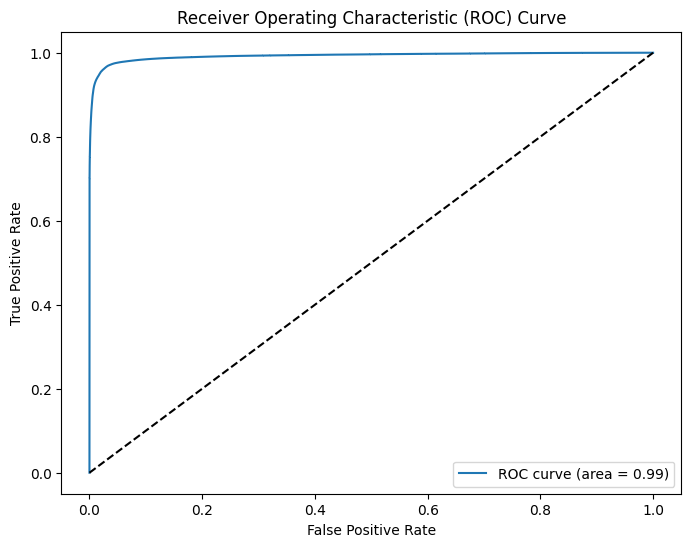

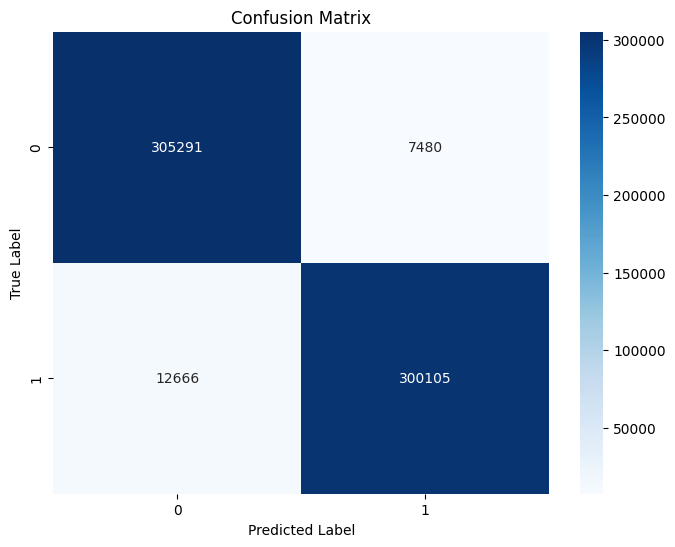

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **Logistic Regression with three feature Lat Lng and time**

In [ ]:

# Separate features and target variable
X = Credit_df.drop(columns=['is_fraud','amt'])
y = Credit_df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




## **LogisticRegression**

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a model and measure time
start_time = time.time()  # Record start time
model = LogisticRegression()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.4982
Precision: 0.4982
Recall: 0.5055
F1 Score: 0.5018
ROC AUC: 0.5058
Training Time: 1.0285 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49    312771
           1       0.50      0.51      0.50    312771

    accuracy                           0.50    625542
   macro avg       0.50      0.50      0.50    625542
weighted avg       0.50      0.50      0.50    625542



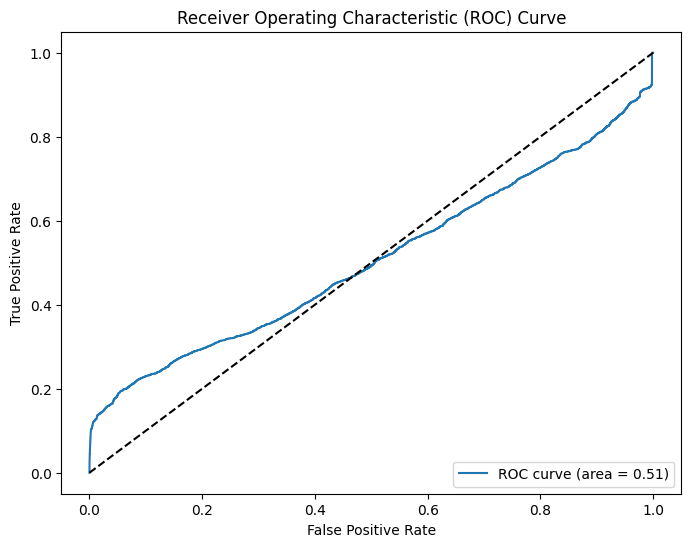

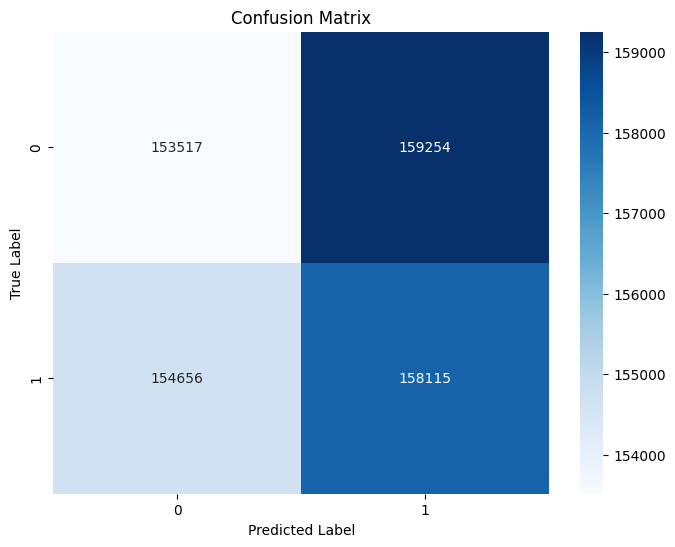

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [23]:


!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:

# Import all necessary libraries and models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier



models = [
    LogisticRegression(),
    XGBClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    MLPClassifier(random_state=42, max_iter=10)  # Adjust max_iter if needed
]


In [3]:
# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust parameters as needed


In [5]:
import time

In [15]:
for model in models:
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')  # Use appropriate scoring metric
    end_time = time.time()
    training_time = end_time - start_time

    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation scores: {cv_results}")
    print(f"Mean accuracy: {np.mean(cv_results):.4f}")
    print(f"Standard deviation: {np.std(cv_results):.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print("-" * 30)

Model: LogisticRegression
Cross-validation scores: [0.82234047 0.82359458 0.82302627 0.82216499 0.8228532 ]
Mean accuracy: 0.8228
Standard deviation: 0.0005
Training Time: 16.3546 seconds
------------------------------
Model: XGBClassifier
Cross-validation scores: [0.98486433 0.98471086 0.98456459 0.98431996 0.98482113]
Mean accuracy: 0.9847
Standard deviation: 0.0002
Training Time: 67.7423 seconds
------------------------------
Model: DecisionTreeClassifier
Cross-validation scores: [0.98337282 0.98301313 0.98347833 0.98333201 0.98364854]
Mean accuracy: 0.9834
Standard deviation: 0.0002
Training Time: 80.4047 seconds
------------------------------
Model: RandomForestClassifier
Cross-validation scores: [0.98520483 0.98503937 0.98528636 0.9852     0.98529352]
Mean accuracy: 0.9852
Standard deviation: 0.0001
Training Time: 2867.4947 seconds
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Model: MLPClassifier
Cross-validation scores: [0.96593754 0.96360196 0.96036717 0.96488717 0.96406468]
Mean accuracy: 0.9638
Standard deviation: 0.0019
Training Time: 931.0956 seconds
------------------------------
